In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
#!pip install tensorflow

# DATA IMPORT

In [62]:
import tensorflow as tf

In [36]:

file="all-data.csv"

# Detect encoding
import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}

In [37]:
df=pd.read_csv(file,encoding='Windows-1252',header=None)

In [38]:
df.head()

,0,1
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [39]:
mycolumns = ['Sentiment','Sentence']

df.columns=mycolumns

In [40]:
pf=df[['Sentence','Sentiment']]

In [41]:
pf.head()

,Sentence,Sentiment
0,"According to Gran , the company has no plans t...",neutral
1,Technopolis plans to develop in stages an area...,neutral
2,The international electronic industry company ...,negative
3,With the new production plant the company woul...,positive
4,According to the company 's updated strategy f...,positive


# DATA PREPARATION

In [42]:
 pf['Sentence']=pf["Sentence"].str.lower()

In [43]:
pf['Sentiments'] = pf['Sentiment'].map({'neutral':0,'positive':1,'negative':-1})

# TF-IDF IMPLEMENTATION

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

analyze = vectorizer.build_analyzer()

In [45]:
vectorizer.fit(pf["Sentence"])

features=vectorizer.transform(pf["Sentence"])

final=pd.DataFrame(features.todense(), columns = vectorizer.get_feature_names())

final['Sentiment']=pf['Sentiments']

In [46]:
final.head()

,00,000,000063,002,0025,003,0030,007,008,01,...,ærnits,ærtsil,ærvi,ærvinen,æsein,æskyl,ætehuolto,ðl,ˆeur,Sentiment
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.147059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [47]:
final.describe()

,00,000,000063,002,0025,003,0030,007,008,01,...,ærnits,ærtsil,ærvi,ærvinen,æsein,æskyl,ætehuolto,ðl,ˆeur,Sentiment
count,4846.000000,4846.000000,4846.000000,4846.000000,4846.000000,4846.000000,4846.000000,4846.000000,4846.000000,4846.000000,...,4846.000000,4846.000000,4846.000000,4846.000000,4846.000000,4846.000000,4846.000000,4846.000000,4846.000000,4846.000000
mean,0.001026,0.007455,0.000058,0.000074,0.000048,0.000050,0.000042,0.000095,0.000078,0.000613,...,0.000047,0.000238,0.000363,0.000104,0.000060,0.000057,0.000063,0.000095,0.000066,0.156624
std,0.015828,0.041798,0.004017,0.005170,0.003336,0.003453,0.002890,0.006592,0.005395,0.013120,...,0.003244,0.008483,0.010453,0.007254,0.004152,0.003980,0.004407,0.006622,0.004569,0.617616
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,0.345644,0.561153,0.279671,0.359932,0.232234,0.240369,0.201161,0.458920,0.375585,0.466995,...,0.225802,0.335597,0.347404,0.504985,0.289021,0.277057,0.306802,0.460949,0.318089,1.000000


# TEST - TRAIN SPLIT

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [51]:
X = final.drop('Sentiment',axis=1)
y = final['Sentiment']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# RANDOM FOREST IMPLEMENTATION AND TUNING

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score,mean_absolute_error,mean_squared_error


In [54]:
test_error = []

for n in range(1,10):
    # Use n random trees
    model = RandomForestClassifier(n_estimators=n,max_features='auto')
    model.fit(X_train,y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))
    print(accuracy_score(test_preds,y_test)*100)

58.35051546391753
62.06185567010309
67.21649484536083
67.42268041237114
71.75257731958763
69.89690721649484
68.65979381443299
72.16494845360825
70.72164948453609


In [90]:
test_error = []

for n in range(1,10):
    # Use n random trees
    model = RandomForestClassifier(n_estimators=n,max_features='sqrt')
    model.fit(X_train,y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))
    print(accuracy_score(test_preds,y_test)*100)

60.824742268041234
60.0
64.12371134020619
67.0103092783505
69.48453608247422
70.10309278350515
68.65979381443299
70.10309278350515
72.16494845360825


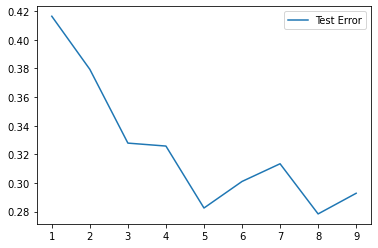

In [55]:
plt.plot(range(1,10),test_error,label='Test Error')
plt.legend()

In [83]:
model = RandomForestClassifier(n_estimators=9,max_features='auto',random_state=101)

model.fit(X_train,y_train)

pred_RF = model.predict(X_test)

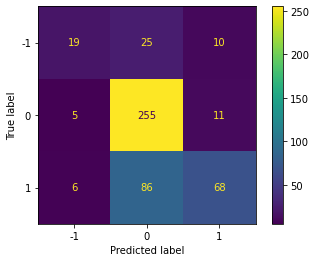

In [84]:
plot_confusion_matrix(model,X_test,y_test)

#### MODEL TUNING

In [87]:
from sklearn.model_selection import GridSearchCV        # takes much time to run on pc

n_estimators=[64,100,128,200]
max_features= ['auto','sqrt']


param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             }  

rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid)

grid.fit(X_train,y_train)

grid.best_params_

# XGB IMPLEMENTATION

In [56]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

C:\Users\Ayush Aryan\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:33:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 77.32%


# NEURAL NETWORK IMPLEMENTATION

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [57]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

MinMaxScaler()

In [58]:
X_train_scaled = scaler.transform(X_train)

X_test_scaled  = scaler.transform(X_test)

In [64]:
model = Sequential()

In [65]:
model.add(Dense(4,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1))

In [68]:
model.compile(optimizer = 'adam',loss='mse')

model.fit(X_train_scaled,y_train,epochs=50,batch_size=256)

Epoch 1/50
18/18 [==============================] - 1s 8ms/step - loss: 0.3964
Epoch 2/50
18/18 [==============================] - 0s 9ms/step - loss: 0.3809
Epoch 3/50
18/18 [==============================] - 0s 9ms/step - loss: 0.3642
Epoch 4/50
18/18 [==============================] - 0s 8ms/step - loss: 0.3261
Epoch 5/50
18/18 [==============================] - 0s 8ms/step - loss: 0.2688
Epoch 6/50
18/18 [==============================] - 0s 8ms/step - loss: 0.2097
Epoch 7/50
18/18 [==============================] - 0s 8ms/step - loss: 0.1561
Epoch 8/50
18/18 [==============================] - 0s 9ms/step - loss: 0.1116
Epoch 9/50
18/18 [==============================] - 0s 10ms/step - loss: 0.0791
Epoch 10/50
18/18 [==============================] - 0s 9ms/step - loss: 0.0574
Epoch 11/50
18/18 [==============================] - 0s 8ms/step - loss: 0.0447
Epoch 12/50
18/18 [==============================] - 0s 8ms/step - loss: 0.0369
Epoch 13/50
18/18 [=============================

<AxesSubplot:>

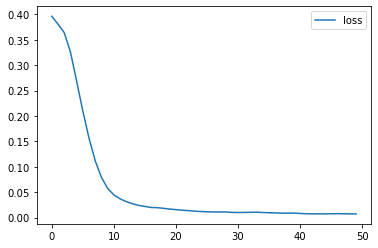

In [70]:
loss= pd.DataFrame(model.history.history)
loss.plot()

In [79]:
#model.evaluate(X_test_scaled,y_test,verbose=0)

pred_nn =model.predict(X_test_scaled)

#checking for errors

In [80]:
mean_squared_error(y_test,pred_nn)

0.34054535500174377